<h1><center><u>Iris Species Prediction</u></center></h1>

#### <u><center><b>Iris-largest genus of the Iridaceae family<b></center></u>
- Irises are a genus of perennial plants that grow from bulbs or rhizomes. They are found in temperate regions of the Northern Hemisphere, from Eurasia to North America, and are often grown as ornamental plants in home and botanical gardens.
- Irises bloom from spring to early summer. The name "Iris" comes from Greek mythology, where it translates to "rainbow". The center petals are known as standards and the downward dropping petals are known as falls.
- Many iris species are used in traditional medicines for the treatment of inflammations, cancer, bacterial and viral infections, and other diseases. In vitro and in vivo studies have shown that Iris spp. exhibit potent antioxidant, anticancer, anti-inflammatory, hepatoprotective, neuroprotective and anti-microbial properties.


- This is a Machine learning project to predict the species of iris
- Iris have a numerous number of species but here we deal with the data of three species
#### Dataset
What is it? The Iris dataset is a multivariate dataset introduced by the British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems." It contains measurements of the sepal length, sepal width, petal length, and petal width of three species of Iris flowers: Iris setosa, Iris virginica, and Iris versicolor.

Structure: The dataset consists of 150 samples, with 50 samples for each species of Iris flower. Each sample includes four features: sepal length, sepal width, petal length, and petal width. These features are used to classify the Iris flowers into their respective species.

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [113]:
data=pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/IRIS.csv')

In [114]:
data.to_csv('C:/Users/User/Desktop/DATA/ML_Projects/datasets/iris.csv',index=False)

In [115]:
df=pd.read_csv('C:/Users/User/Desktop/DATA/ML_Projects/datasets/iris.csv')

In [116]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [117]:
df.shape

(150, 5)

In [118]:
df.size

750

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [120]:
cols=['sepal_length','sepal_width','petal_length','petal_width','species']

In [121]:
df['sepal_length'].unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [122]:
for i in cols:
    un=df[i].unique()
    print(F'FEATURE:{i}\n{un}\n\n')

FEATURE:sepal_length
[5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]


FEATURE:sepal_width
[3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]


FEATURE:petal_length
[1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]


FEATURE:petal_width
[0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]


FEATURE:species
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']




In [123]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

- the dataset is a cleaned one as there is neither missing nor null values

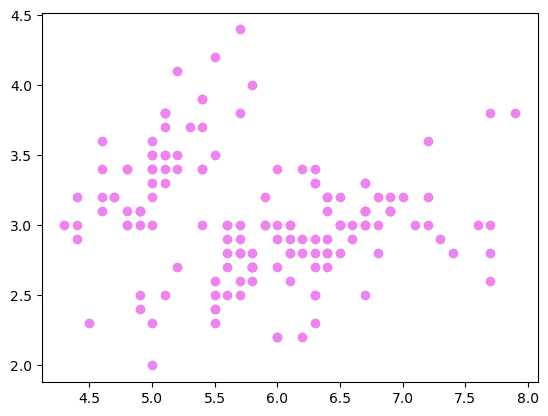

In [124]:
plt.scatter(x='sepal_length',y='sepal_width',data=df,color='violet')

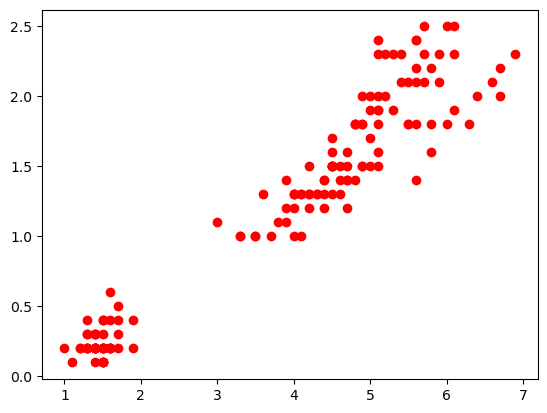

In [125]:
plt.scatter(df['petal_length'],df['petal_width'],color='red')

## Train Test Split

In [126]:
X=df.iloc[:,0:-1]

In [127]:
y=df['species']

In [128]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

## Model using SVC

In [137]:
from sklearn.svm import SVC

In [130]:
svc=SVC()

In [131]:
svc

SVC()

In [132]:
svc.fit(x_train, y_train)

SVC()

In [133]:
from sklearn.metrics import accuracy_score

In [134]:
print("Accuracy is ",accuracy_score(y_test,svc.predict(x_test)))

Accuracy is  1.0


- I have Used SVC algorithm to create Model
- Model performance have evaluated by using the Accuracy score and resulted as better model
- Prediction is made by using the model which is given below , Input the sepal length,sepal width, petal width and petal leangth of the iris and model will predict the output and shows the species

## Prediction

In [135]:
print('Enter the species measure: ')
print('-' * len('Enter the species measure: '))

a=float(input('\nsepal-length: '))
b=float(input('sepal-width: '))
c=float(input('petal-length: '))
d=float(input('petal-width: '))
x_new = np.array([[a, b, c, d]])
prediction = svc.predict(x_new)
print("Prediction: {}".format(prediction))

Enter the species measure: 
---------------------------



sepal-length:  1
sepal-width:  1
petal-length:  1
petal-width:  1


Prediction: ['Iris-setosa']
